# Project 4 - Cost Benefit Analysis

__Table of Contents:__
- [Loading of realated data](#Load-related-data)
- [Spray characteristics](#Spray-characteristics)
- [Effectiveness of spray on number of mosquitos](#Effectiveness-of-spray-on-number-of-mosquitos)
- [Benefits](#Benefits)
- [Costs](#Costs)
- [Projected cases of West Nile Virus](#Projected-cases-of-West-Nile-Virus)
- [Further work](#Further-work)
- [Conclusion](#Conclusion)


Once we have done the EDA to undestand the datasets and modelling to predict the existence of West Nile Virus, we should then use the model to predict number of cases and possible costs. Finally, we weigh the cost and benefits to see if indeed spraying of insecticide should really help in lowering the number of mosquitos or West Nile Virus. 

In [362]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
from math import sin, cos, sqrt, atan2, radians


%matplotlib inline
plt.style.use('seaborn')
#pandas options
pd.set_option('display.max_columns', 500)

## Load related data

### Spray

In [2]:
df_spray = pd.read_csv('./assets/spray.csv')

In [3]:
df_spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [4]:
df_spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
Date         14835 non-null object
Time         14251 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [8]:
df_spray['Date'] = pd.to_datetime(df_spray['Date'])

In [10]:
df_spray['Time'] = pd.to_datetime(df_spray['Time'])

In [11]:
df_spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
Date         14835 non-null datetime64[ns]
Time         14251 non-null datetime64[ns]
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: datetime64[ns](2), float64(2)
memory usage: 463.7 KB


In [12]:
df_spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,2019-11-07 18:56:58,42.391623,-88.089163
1,2011-08-29,2019-11-07 18:57:08,42.391348,-88.089163
2,2011-08-29,2019-11-07 18:57:18,42.391022,-88.089157
3,2011-08-29,2019-11-07 18:57:28,42.390637,-88.089158
4,2011-08-29,2019-11-07 18:57:38,42.390410,-88.088858


In [342]:
df_spray.sort_values(by=['Date', 'Time'])

,Date,Time,Latitude,Longitude
0,2011-08-29,2019-11-07 18:56:58,42.391623,-88.089163
1,2011-08-29,2019-11-07 18:57:08,42.391348,-88.089163
2,2011-08-29,2019-11-07 18:57:18,42.391022,-88.089157
3,2011-08-29,2019-11-07 18:57:28,42.390637,-88.089158
4,2011-08-29,2019-11-07 18:57:38,42.390410,-88.088858
5,2011-08-29,2019-11-07 18:57:48,42.390395,-88.088315
6,2011-08-29,2019-11-07 18:57:58,42.390673,-88.088002
7,2011-08-29,2019-11-07 18:58:08,42.391027,-88.088002
8,2011-08-29,2019-11-07 18:58:18,42.391403,-88.088003
9,2011-08-29,2019-11-07 18:58:28,42.391718,-88.087995


In [63]:
df_spray_agg = df_spray.groupby('Date').count()['Latitude'].to_frame()

In [341]:
df_spray_agg.columns = ['spray_locations']
df_spray_agg.sort_index()

,spray_locations
Date,
2011-08-29,95
2011-09-07,2114
2013-07-17,2202
2013-07-25,1607
2013-08-08,1195
2013-08-15,2668
2013-08-16,141
2013-08-22,1587
2013-08-29,2302


In [65]:
df_spray_agg.index

DatetimeIndex(['2011-08-29', '2011-09-07', '2013-07-17', '2013-07-25',
               '2013-08-08', '2013-08-15', '2013-08-16', '2013-08-22',
               '2013-08-29', '2013-09-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

### Train data

In [35]:
df_tr = pd.read_csv('./assets/df_tr_full_updated.csv')

In [36]:
df_tr.head()

,Date,month,year,Block,Latitude,Longitude,Street,Trap,Species,NumMosquitos,WnvPresent,Tmax,Tmin,Tavg,DewPoint,dew_point_depression,WetBulb,wet_bulb_depression,relative_humidity,Heat,Cool,Sunrise,Sunset,daytime,PrecipTotal,StnPressure,ResultSpeed,ResultDir,DZ,BR,FG,HZ,RA,TS,TSRA,VCTS
0,2007-05-29,5.0,2007.0,41,41.954690,-87.800991,N OAK PARK AVE,T002,CULEX PIPIENS/RESTUANS,1.0,0.0,88.0,60.0,74.0,58.0,16.0,65.0,9.0,57.0,0.0,9.0,0 days 04:21:00.000000000,0 days 19:17:00.000000000,0 days 14:56:00.000000000,0.0,29.39,5.8,18.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2007-05-29,5.0,2007.0,41,41.954690,-87.800991,N OAK PARK AVE,T002,CULEX RESTUANS,1.0,0.0,88.0,60.0,74.0,58.0,16.0,65.0,9.0,57.0,0.0,9.0,0 days 04:21:00.000000000,0 days 19:17:00.000000000,0 days 14:56:00.000000000,0.0,29.39,5.8,18.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2007-05-29,5.0,2007.0,62,41.994991,-87.769279,N MANDELL AVE,T007,CULEX RESTUANS,1.0,0.0,88.0,60.0,74.0,58.0,16.0,65.0,9.0,57.0,0.0,9.0,0 days 04:21:00.000000000,0 days 19:17:00.000000000,0 days 14:56:00.000000000,0.0,29.39,5.8,18.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2007-05-29,5.0,2007.0,79,41.974089,-87.824812,W FOSTER AVE,T015,CULEX PIPIENS/RESTUANS,1.0,0.0,88.0,60.0,74.0,58.0,16.0,65.0,9.0,57.0,0.0,9.0,0 days 04:21:00.000000000,0 days 19:17:00.000000000,0 days 14:56:00.000000000,0.0,29.39,5.8,18.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2007-05-29,5.0,2007.0,79,41.974089,-87.824812,W FOSTER AVE,T015,CULEX RESTUANS,4.0,0.0,88.0,60.0,74.0,58.0,16.0,65.0,9.0,57.0,0.0,9.0,0 days 04:21:00.000000000,0 days 19:17:00.000000000,0 days 14:56:00.000000000,0.0,29.39,5.8,18.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [37]:
df_tr['Date'] =  pd.to_datetime(df_tr['Date'])

In [38]:
df_tr.head()

,Date,month,year,Block,Latitude,Longitude,Street,Trap,Species,NumMosquitos,WnvPresent,Tmax,Tmin,Tavg,DewPoint,dew_point_depression,WetBulb,wet_bulb_depression,relative_humidity,Heat,Cool,Sunrise,Sunset,daytime,PrecipTotal,StnPressure,ResultSpeed,ResultDir,DZ,BR,FG,HZ,RA,TS,TSRA,VCTS
0,2007-05-29,5.0,2007.0,41,41.954690,-87.800991,N OAK PARK AVE,T002,CULEX PIPIENS/RESTUANS,1.0,0.0,88.0,60.0,74.0,58.0,16.0,65.0,9.0,57.0,0.0,9.0,0 days 04:21:00.000000000,0 days 19:17:00.000000000,0 days 14:56:00.000000000,0.0,29.39,5.8,18.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2007-05-29,5.0,2007.0,41,41.954690,-87.800991,N OAK PARK AVE,T002,CULEX RESTUANS,1.0,0.0,88.0,60.0,74.0,58.0,16.0,65.0,9.0,57.0,0.0,9.0,0 days 04:21:00.000000000,0 days 19:17:00.000000000,0 days 14:56:00.000000000,0.0,29.39,5.8,18.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2007-05-29,5.0,2007.0,62,41.994991,-87.769279,N MANDELL AVE,T007,CULEX RESTUANS,1.0,0.0,88.0,60.0,74.0,58.0,16.0,65.0,9.0,57.0,0.0,9.0,0 days 04:21:00.000000000,0 days 19:17:00.000000000,0 days 14:56:00.000000000,0.0,29.39,5.8,18.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2007-05-29,5.0,2007.0,79,41.974089,-87.824812,W FOSTER AVE,T015,CULEX PIPIENS/RESTUANS,1.0,0.0,88.0,60.0,74.0,58.0,16.0,65.0,9.0,57.0,0.0,9.0,0 days 04:21:00.000000000,0 days 19:17:00.000000000,0 days 14:56:00.000000000,0.0,29.39,5.8,18.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2007-05-29,5.0,2007.0,79,41.974089,-87.824812,W FOSTER AVE,T015,CULEX RESTUANS,4.0,0.0,88.0,60.0,74.0,58.0,16.0,65.0,9.0,57.0,0.0,9.0,0 days 04:21:00.000000000,0 days 19:17:00.000000000,0 days 14:56:00.000000000,0.0,29.39,5.8,18.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## Spray characteristics

__Spray type__

Zenivex™ has been used effectively to control disease-carrying __adult__ mosquitoes and is non-persistent, decomposing rapidly in the environment.

__Spray Contractor__: Vector Disease Control 

__Spray application__

- When West Nile Virus gets worse at a certain area
- 1.5 fluid ounces per acre
- Apply to wind speeds >= 1mph <= 10 mph
- Use a vehicle-mounted cold aerosol ULV sprayer to apply the product

https://mikenowak.net/radio/how-effective-is-urban-mosquito-control/

https://www.centralmosquitocontrol.com/

## Effectiveness of spray on number of mosquitos

In [78]:
#calc of distance using harvine's formula
def calc_dist_chk(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    #formula calc distance between two points 
    #haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    #distance in km
    distance = R * c

    return round(distance, 4)

In [204]:
df_after_spray_final = pd.DataFrame(columns=['last_spray_date', 'spray_lat', 'spray_lng', 'tr_date', 'tr_lat', 'tr_lng' , 'num_mosquitos'])

In [205]:
for i in range(df_spray.shape[0]): #loop thru spray date
        spray_date = df_spray.loc[i, 'Date']
        spray_lat = df_spray.loc[i, 'Latitude']
        spray_lon = df_spray.loc[i, 'Longitude']
        
        tr_coincide = df_tr[(df_tr['Date'] > spray_date)].reset_index()
        for j in range(tr_coincide.shape[0]): #loop thru train 
            tr_date = tr_coincide.loc[j, 'Date']
            tr_lat = tr_coincide.loc[j, 'Latitude']
            tr_lon = tr_coincide.loc[j, 'Longitude']
            num_mosquito = tr_coincide.loc[j, 'NumMosquitos']
            if calc_dist_chk(tr_lat, tr_lon, spray_lat, spray_lon) < 0.2:
                print('Spray near traps')
                df_after_spray_final = df_after_spray_final.append({'last_spray_date': spray_date,
                                      'spray_lat': spray_lat,
                                      'spray_lng': spray_lon,
                                      'tr_date':  tr_date,
                                      'tr_lat': tr_lat,
                                      'tr_lng': tr_lon,
                                        'num_mosquitos': num_mosquito}, ignore_index=True)

Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near tra

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/clementow/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-205-1a90461d785c>", line 9, in <module>
    tr_lon = tr_coincide.loc[j, 'Longitude']
  File "/Users/clementow/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 1490, in __getitem__
    if self._is_scalar_access(key):
  File "/Users/clementow/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 1816, in _is_scalar_access
    ax = self.obj.axes[i]
  File "/Users/clementow/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 474, in axes
    @property
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/clementow/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2039, in showtraceback
    stb = value._

KeyboardInterrupt: 

In [228]:
df_tr[(df_tr['Date']>='2013-01-01') & (df_tr['WnvPresent'] == 1)]

,Date,month,year,Block,Latitude,Longitude,Street,Trap,Species,NumMosquitos,WnvPresent,Tmax,Tmin,Tavg,DewPoint,dew_point_depression,WetBulb,wet_bulb_depression,relative_humidity,Heat,Cool,Sunrise,Sunset,daytime,PrecipTotal,StnPressure,ResultSpeed,ResultDir,DZ,BR,FG,HZ,RA,TS,TSRA,VCTS
2681,2013-07-12,7.0,2013.0,70,42.008314,-87.777921,N MOSELL AVE,T008,CULEX PIPIENS/RESTUANS,33.0,1.0,83.0,58.0,71.0,53.0,18.0,61.0,10.0,53.0,0.0,6.0,0 days 04:27:00.000000000,0 days 19:28:00.000000000,0 days 15:01:00.000000000,0.000,29.38,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2682,2013-07-12,7.0,2013.0,70,42.008314,-87.777921,N MOSELL AVE,T008,CULEX RESTUANS,45.0,1.0,83.0,58.0,71.0,53.0,18.0,61.0,10.0,53.0,0.0,6.0,0 days 04:27:00.000000000,0 days 19:28:00.000000000,0 days 15:01:00.000000000,0.000,29.38,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2714,2013-07-12,7.0,2013.0,39,41.951866,-87.725057,N SPRINGFIELD AVE,T228,CULEX RESTUANS,29.0,1.0,83.0,58.0,71.0,53.0,18.0,61.0,10.0,53.0,0.0,6.0,0 days 04:27:00.000000000,0 days 19:28:00.000000000,0 days 15:01:00.000000000,0.000,29.38,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2717,2013-07-12,7.0,2013.0,58,41.987280,-87.666066,N RIDGE AVE,T231,CULEX RESTUANS,19.0,1.0,83.0,58.0,71.0,53.0,18.0,61.0,10.0,53.0,0.0,6.0,0 days 04:27:00.000000000,0 days 19:28:00.000000000,0 days 15:01:00.000000000,0.000,29.38,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2731,2013-07-19,7.0,2013.0,46,41.964242,-87.757639,N MILWAUKEE AVE,T003,CULEX PIPIENS/RESTUANS,7.0,1.0,96.0,71.0,84.0,70.0,14.0,75.0,9.0,63.0,0.0,19.0,0 days 04:33:00.000000000,0 days 19:23:00.000000000,0 days 14:50:00.000000000,0.580,29.10,13.3,25.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2733,2013-07-19,7.0,2013.0,70,42.008314,-87.777921,N MOSELL AVE,T008,CULEX PIPIENS/RESTUANS,50.0,1.0,96.0,71.0,84.0,70.0,14.0,75.0,9.0,63.0,0.0,19.0,0 days 04:33:00.000000000,0 days 19:23:00.000000000,0 days 14:50:00.000000000,0.580,29.10,13.3,25.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2741,2013-07-19,7.0,2013.0,61,41.923738,-87.785288,W FULLERTON AVE,T013,CULEX PIPIENS/RESTUANS,23.0,1.0,96.0,71.0,84.0,70.0,14.0,75.0,9.0,63.0,0.0,19.0,0 days 04:33:00.000000000,0 days 19:23:00.000000000,0 days 14:50:00.000000000,0.580,29.10,13.3,25.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2751,2013-07-19,7.0,2013.0,10,41.974689,-87.890615,W OHARE AIRPORT,T900,CULEX PIPIENS/RESTUANS,49.0,1.0,96.0,71.0,84.0,70.0,14.0,75.0,9.0,63.0,0.0,19.0,0 days 04:33:00.000000000,0 days 19:23:00.000000000,0 days 14:50:00.000000000,0.580,29.10,13.3,25.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2760,2013-07-19,7.0,2013.0,10,41.974689,-87.890615,W OHARE AIRPORT,T900,CULEX RESTUANS,47.0,1.0,96.0,71.0,84.0,70.0,14.0,75.0,9.0,63.0,0.0,19.0,0 days 04:33:00.000000000,0 days 19:23:00.000000000,0 days 14:50:00.000000000,0.580,29.10,13.3,25.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2762,2013-07-19,7.0,2013.0,10,41.974689,-87.890615,W OHARE AIRPORT,T900,CULEX RESTUANS,46.0,1.0,96.0,71.0,84.0,70.0,14.0,75.0,9.0,63.0,0.0,19.0,0 days 04:33:00.000000000,0 days 19:23:00.000000000,0 days 14:50:00.000000000,0.580,29.10,13.3,25.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [230]:
#only want those observations which are after spray date
df_after_spray_final = df_after_spray_final[(df_after_spray_final['tr_date'] > df_after_spray_final['last_spray_date'])]

In [225]:
df_after_spray_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7192 entries, 0 to 7191
Data columns (total 7 columns):
last_spray_date    7192 non-null datetime64[ns]
spray_lat          7192 non-null float64
spray_lng          7192 non-null float64
tr_date            7192 non-null datetime64[ns]
tr_lat             7192 non-null float64
tr_lng             7192 non-null float64
num_mosquitos      7192 non-null float64
dtypes: datetime64[ns](2), float64(5)
memory usage: 393.4 KB


In [231]:
num_mos_nearby = df_after_spray_final.groupby('tr_date').sum()['num_mosquitos'].to_frame()

In [234]:
num_mos_nearby

,num_mosquitos
tr_date,
2011-09-12,80.0
2011-09-16,128.0
2011-09-23,208.0
2011-09-30,56.0
2013-06-07,16.0
2013-06-14,232.0
2013-06-21,72.0
2013-06-27,88.0
2013-07-08,8.0


In [217]:
df_spray_agg.index

DatetimeIndex(['2011-08-29', '2011-09-07', '2013-07-17', '2013-07-25',
               '2013-08-08', '2013-08-15', '2013-08-16', '2013-08-22',
               '2013-08-29', '2013-09-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

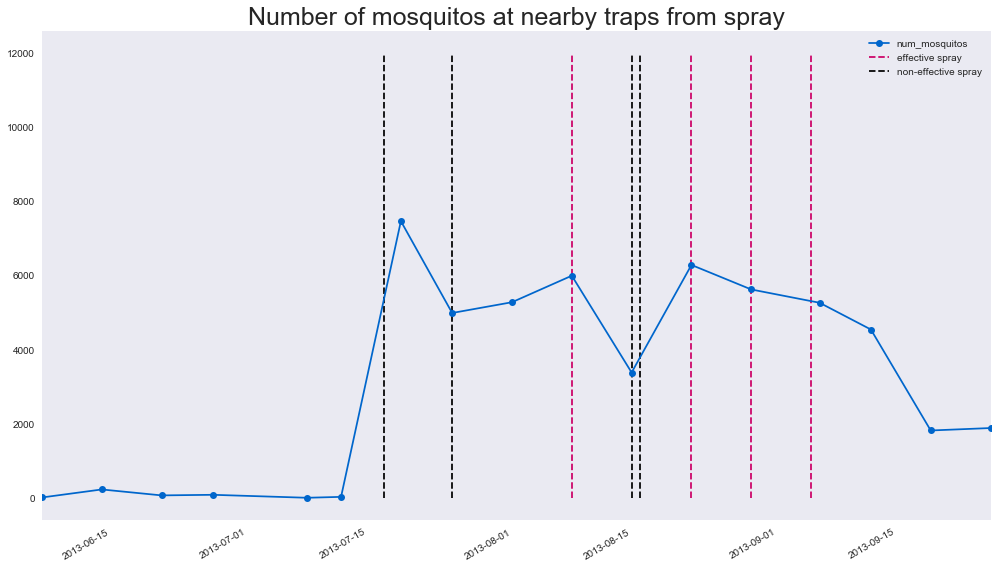

In [360]:
num_mos_nearby['2013'].plot(figsize=(17,10), marker='o', color='#0066cc');
plt.vlines(['2013-08-08','2013-08-22', '2013-08-29', '2013-09-05'], ymin=0, ymax=12000, linestyles='dashed', color='#cc0066', label='effective spray');
plt.vlines(['2013-07-17', '2013-07-25', '2013-08-15', '2013-08-16'], ymin=0, ymax=12000, linestyles='dashed', label='non-effective spray');
plt.title("Number of mosquitos at nearby traps from spray", size=25);
plt.xlabel("")
plt.grid(b=False)
plt.legend();

This plot shows if spraying helps to decrease the total number of mosquitos. Four sprays, for example in July 17 and end July of 2013 does not result in the decrease of mosquitos while the other 4 sprays actually do have an effect in the decrease of the mosquito population. 

We can thus conclude that it still helps to decrease the mosquito popluation. 

## Benefits

- Lowers the number of mosquitos which are carriers of not only West Nile virus but also other vector bourne diseases such as Zika 
- Lower the high costs of possible medical and hospitalisation fees
- Reduce costs of the state to handle such outbreaks and emergencies

## Costs

We know what the benefits are and obviously lowering the occurence of virus will be beneficial for the population of Chicago. 
Now let's look at how cost effective it is spraying really is. 

Yearly estimated costs can be segregated into two categories:
- Medical fees 
- Vector control measures - Spraying insecticide

__Medical fees__ 

It was researched that medical and hospitalisation fees of WNV related cases amounted to an estimated \\$673 million to \\$1\.01 billion in 1999 to 2012 with a 95% confidence level. This amounts to about \\$168 million to \\$250 million per year.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3945683/

__Vector control measures - Spraying insecticide__

The closest cost estimate that was found was for the State of California in 2012 during a West Nile Virus outbreak. It was reported that insecticide was sprayed on 477 kilometre squares (117869 acres) of affected areas and that amounted to \$701,790, including spray procedures and overtime hours. 

https://wwwnc.cdc.gov/eid/article/16/3/09-0667_article

## Projected cases of West Nile Virus

In [346]:
tst_pred_prob = pd.read_csv('./assets/answer_abc.csv') 

In [347]:
#predicted WNV for test set
df_tst_predict = tst_pred_prob[tst_pred_prob['WnvPresent'] >= 0.5].sort_values(by='WnvPresent', ascending=False) #14197 rows

In [348]:
df_test = pd.read_csv('./assets/df_tst_full_updated.csv')

In [349]:
df_test.head()

,Date,month,year,Block,Latitude,Longitude,Street,Trap,Species,Tmax,Tmin,Tavg,DewPoint,dew_point_depression,WetBulb,wet_bulb_depression,relative_humidity,Heat,Cool,Sunrise,Sunset,daytime,PrecipTotal,StnPressure,ResultSpeed,ResultDir,DZ,BR,FG,HZ,RA,TS,TSRA,VCTS
0,2008-06-11,6.0,2008.0,41,41.95469,-87.800991,N OAK PARK AVE,T002,CULEX PIPIENS/RESTUANS,86.0,61.0,74.0,56.0,18.0,64.0,10.0,53.0,0.0,9.0,0 days 04:16:00.000000000,0 days 19:26:00.000000000,0 days 15:10:00.000000000,0.0,29.28,8.9,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2008-06-11,6.0,2008.0,41,41.95469,-87.800991,N OAK PARK AVE,T002,CULEX RESTUANS,86.0,61.0,74.0,56.0,18.0,64.0,10.0,53.0,0.0,9.0,0 days 04:16:00.000000000,0 days 19:26:00.000000000,0 days 15:10:00.000000000,0.0,29.28,8.9,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2008-06-11,6.0,2008.0,41,41.95469,-87.800991,N OAK PARK AVE,T002,CULEX PIPIENS,86.0,61.0,74.0,56.0,18.0,64.0,10.0,53.0,0.0,9.0,0 days 04:16:00.000000000,0 days 19:26:00.000000000,0 days 15:10:00.000000000,0.0,29.28,8.9,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2008-06-11,6.0,2008.0,41,41.95469,-87.800991,N OAK PARK AVE,T002,CULEX SALINARIUS,86.0,61.0,74.0,56.0,18.0,64.0,10.0,53.0,0.0,9.0,0 days 04:16:00.000000000,0 days 19:26:00.000000000,0 days 15:10:00.000000000,0.0,29.28,8.9,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008-06-11,6.0,2008.0,41,41.95469,-87.800991,N OAK PARK AVE,T002,CULEX TERRITANS,86.0,61.0,74.0,56.0,18.0,64.0,10.0,53.0,0.0,9.0,0 days 04:16:00.000000000,0 days 19:26:00.000000000,0 days 15:10:00.000000000,0.0,29.28,8.9,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [350]:
#getting the predicted locations
df_tst_predict_loc = df_test.merge(df_tst_predict, left_on=df_test.index, right_on=df_tst_predict.Id)

In [351]:
df_tst_predict_loc.shape

(14917, 37)

In [352]:
df_tst_predict_loc['Date'] = pd.to_datetime(df_tst_predict_loc['Date'])

In [353]:
#predicted WNV cases in subsequent years
pred_by_year = df_tst_predict_loc['year'].value_counts().to_frame().sort_index()

In [357]:
pred_by_year.columns = ['Pred_WnvPresent']

In [356]:
pred_by_year

,Pred_WnvPresent
2008.0,2261
2010.0,2943
2012.0,4948
2014.0,4765


## Further work

Since there is a missing component in the data, we should include the bird migratory data for affected birds that carry the West Nile Virus. 

Even though the number of mosquitos are not directly related to the existence of the virus, we should still aim to reduce the number of mosquitos as they are afterall a carrier of the virus. So we could model to predict the number of mosquitos so that we can further aim at cluster areas to reduce the population of mosquitos. 

## Conclusion

| Type     | Cost                         |
|----------|------------------------------|
| Medical  | \\$168 million to \\$250 million |
| Spraying | \\$701,790                     |


Assuming there will be an outbreak, the medical fees are estimated to be \\$168 million to \\$250 million and conversely if the state will have to spray, assuming they spray 477 square kilometres, it will be only just \\$701,790.

This seems to be an obvious choice to choose one of the vector control methods, spraying of insecticide to save future costs impacted by the existence of the West Nile Virus. 

However, West Nile Virus and mosquito populations should be everyone's problem so that we can combat the West Nile Virus and other vector bourne diseases together. We can educate the public to remove stagnant water and other favourable conditions of mosquito breeding starting from their own homes and workplaces. This should be the best way forward to prevent the laying eggs of mosquitos. 